# Evaluation Project -9 Rainfall Prediction - Weather Forecasting

# Problem Statement:
Rain Prediction –Weather forecasting

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.



# Importing all the necessary libraries:

In [27]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Load the dataset:

In [28]:
df=pd.read_csv('weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# Dataset Description:

>Number of columns: 23


>Date  - The date of observation

>Location  -The common name of the location of the weather station

>MinTemp  -The minimum temperature in degrees celsius

>MaxTemp -The maximum temperature in degrees celsius

>Rainfall  -The amount of rainfall recorded for the day in mm

>Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

>Sunshine  -The number of hours of bright sunshine in the day.

>WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

>WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

>WindDir9am -Direction of the wind at 9am

>WindDir3pm -Direction of the wind at 3pm

>WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

>WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

>Humidity9am -Humidity (percent) at 9am

>Humidity3pm -Humidity (percent) at 3pm

>Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

>Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

>Cloud9am - Fraction of sky obscured by cloud at 9am. 

>Cloud3pm -Fraction of sky obscured by cloud 

>Temp9am-Temperature (degrees C) at 9am

>Temp3pm -Temperature (degrees C) at 3pm

>RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

>RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".



In [29]:
df.columns# columns of the datset

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [30]:
df.shape# checking the dimension of the data

(8425, 23)

In [31]:
df.info()# Getting the information of non null count and dtype of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [32]:
df['RainTomorrow'].value_counts() #To check the count of values in target variable('RainTomorrow')

No     6195
Yes    1991
Name: RainTomorrow, dtype: int64

In [33]:
df.isnull().sum() #checking the null value count of all the coulumns

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

# IterativeImputer:
It is used for removing and replacing the null count

In [34]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.compose import make_column_transformer
iter_imp=IterativeImputer()
ct=make_column_transformer( (iter_imp,['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm','Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am','Temp3pm']),
                            remainder='passthrough')

it_df=pd.DataFrame(ct.fit_transform(df))
it_df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,13.4,22.9,0.6,5.146735,6.567859,44.0,20.0,24.0,71.0,22.0,...,5.182827,16.9,21.8,2008-12-01,Albury,W,W,WNW,No,No
1,7.4,25.1,0.0,5.824202,12.406433,44.0,4.0,22.0,44.0,25.0,...,1.649611,17.2,24.3,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,12.9,25.7,0.0,7.243981,11.820881,46.0,19.0,26.0,38.0,30.0,...,2.0,21.0,23.2,2008-12-03,Albury,WSW,W,WSW,No,No
3,9.2,28.0,0.0,5.406861,12.886565,24.0,11.0,9.0,45.0,16.0,...,1.061087,18.1,26.5,2008-12-04,Albury,NE,SE,E,No,No
4,17.5,32.3,1.0,5.333187,6.369314,41.0,7.0,20.0,82.0,33.0,...,8.0,17.8,29.7,2008-12-05,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2.8,23.4,0.0,4.07979,11.912692,31.0,13.0,11.0,51.0,24.0,...,1.503963,10.1,22.4,2017-06-21,Uluru,E,SE,ENE,No,No
8421,3.6,25.3,0.0,3.812303,12.548026,22.0,13.0,9.0,56.0,21.0,...,1.076773,10.9,24.5,2017-06-22,Uluru,NNW,SE,N,No,No
8422,5.4,26.9,0.0,5.611019,12.315648,37.0,9.0,9.0,53.0,24.0,...,1.508223,12.5,26.1,2017-06-23,Uluru,N,SE,WNW,No,No
8423,7.8,27.0,0.0,5.883597,11.106576,28.0,13.0,7.0,51.0,24.0,...,2.0,15.1,26.0,2017-06-24,Uluru,SE,SSE,N,No,No


# Adjusting the data columns into same as df dataset and indexing

In [35]:
column_to_move = it_df.pop(16)
it_df.insert(0, 'Date', column_to_move)
column_to_move1 = it_df.pop(17)
it_df.insert(1, 'Location', column_to_move1)
column_to_move2 = it_df.pop(18)
it_df.insert(7, 'WindGustDir', column_to_move2)
column_to_move3 = it_df.pop(19)
it_df.insert(9, 'WindDir9am', column_to_move3)
column_to_move4 = it_df.pop(20)
it_df.insert(10, 'WindDir3pm', column_to_move4)

In [36]:
it_df.columns=df.columns
it_df.index=df.index

In [37]:
it_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.146735,6.567859,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,5.182827,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.824202,12.406433,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,1.047056,1.649611,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,7.243981,11.820881,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,2.100946,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.406861,12.886565,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,0.452548,1.061087,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.333187,6.369314,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,4.07979,11.912692,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,0.666422,1.503963,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,3.812303,12.548026,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,0.53211,1.076773,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,5.611019,12.315648,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,0.779473,1.508223,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,5.883597,11.106576,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# filling null values of object type features with mode method

In [38]:
it_df = it_df.apply(lambda x: x.fillna(x.value_counts().index[0]))
it_df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

# Describing the dataset

In [39]:
it_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,13.194294,23.857947,2.838292,5.034172,7.457193,39.297998,13.858739,18.508434,67.833486,51.243486,1017.810984,1015.356942,4.408351,4.348689,17.766091,22.429312
std,5.390522,6.124564,10.330502,4.290490,3.698789,14.809269,10.166880,9.721978,16.789487,18.373574,6.353498,6.277211,2.656876,2.520556,5.615919,5.962223
min,-2.000000,8.200000,-5.995908,-3.614712,-1.653687,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,-1.866715,-2.630109,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.700000,28.157988,6.000000,11.000000,56.000000,39.000000,1013.900000,1011.300000,2.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.591377,7.808209,37.000000,13.000000,19.000000,68.000000,51.000000,1018.001722,1015.568277,4.700894,4.371862,17.800000,21.900000
75%,17.400000,28.000000,1.200000,6.748722,10.300000,48.000000,20.000000,24.000000,80.000000,63.000000,1021.700000,1019.100000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,18.090984,131.206997,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,10.335280,9.888378,39.400000,44.100000


In [40]:
it_df['RainTomorrow'].value_counts()

No     6434
Yes    1991
Name: RainTomorrow, dtype: int64

No     6434
Yes    1991
Name: RainTomorrow, dtype: int64


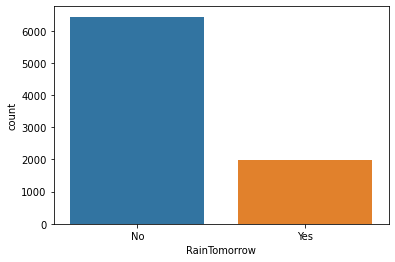

In [41]:
ax=sns.countplot(x='RainTomorrow',data=it_df)
print(it_df['RainTomorrow'].value_counts())

> We need to balance the data since there is imbalance shown in the above graph.

# label encoder:
Used to convert object type label to label format.

In [111]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
it_df['RainTomorrow']=LE.fit_transform(it_df['RainTomorrow'])
it_df['RainTomorrow'].value_counts()

0    6434
1    1991
Name: RainTomorrow, dtype: int64

# OrdinalEncoder:
converting all the other features to ordinal format

In [43]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc=OrdinalEncoder()

for i in it_df.columns:
    if it_df[i].dtypes=="object":
        it_df[i]=ord_enc.fit_transform(it_df[i].values.reshape(-1,1))
it_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.0,1.0,13.4,22.900000,0.6,5.146735,6.567859,13.0,44.000000,13.0,...,71.0,22.0,1007.7,1007.1,8.000000,5.182827,16.9,21.8,0.0,0
1,1.0,1.0,7.4,25.100000,0.0,5.824202,12.406433,14.0,44.000000,6.0,...,44.0,25.0,1010.6,1007.8,1.047056,1.649611,17.2,24.3,0.0,0
2,2.0,1.0,12.9,25.700000,0.0,7.243981,11.820881,15.0,46.000000,13.0,...,38.0,30.0,1007.6,1008.7,2.100946,2.000000,21.0,23.2,0.0,0
3,3.0,1.0,9.2,28.000000,0.0,5.406861,12.886565,4.0,24.000000,9.0,...,45.0,16.0,1017.6,1012.8,0.452548,1.061087,18.1,26.5,0.0,0
4,4.0,1.0,17.5,32.300000,1.0,5.333187,6.369314,13.0,41.000000,1.0,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2999.0,9.0,2.8,23.400000,0.0,4.079790,11.912692,0.0,31.000000,9.0,...,51.0,24.0,1024.6,1020.3,0.666422,1.503963,10.1,22.4,0.0,0
8421,3000.0,9.0,3.6,25.300000,0.0,3.812303,12.548026,6.0,22.000000,9.0,...,56.0,21.0,1023.5,1019.1,0.532110,1.076773,10.9,24.5,0.0,0
8422,3001.0,9.0,5.4,26.900000,0.0,5.611019,12.315648,3.0,37.000000,9.0,...,53.0,24.0,1021.0,1016.8,0.779473,1.508223,12.5,26.1,0.0,0
8423,3002.0,9.0,7.8,27.000000,0.0,5.883597,11.106576,9.0,28.000000,10.0,...,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0.0,0


# Correlation using heat map:

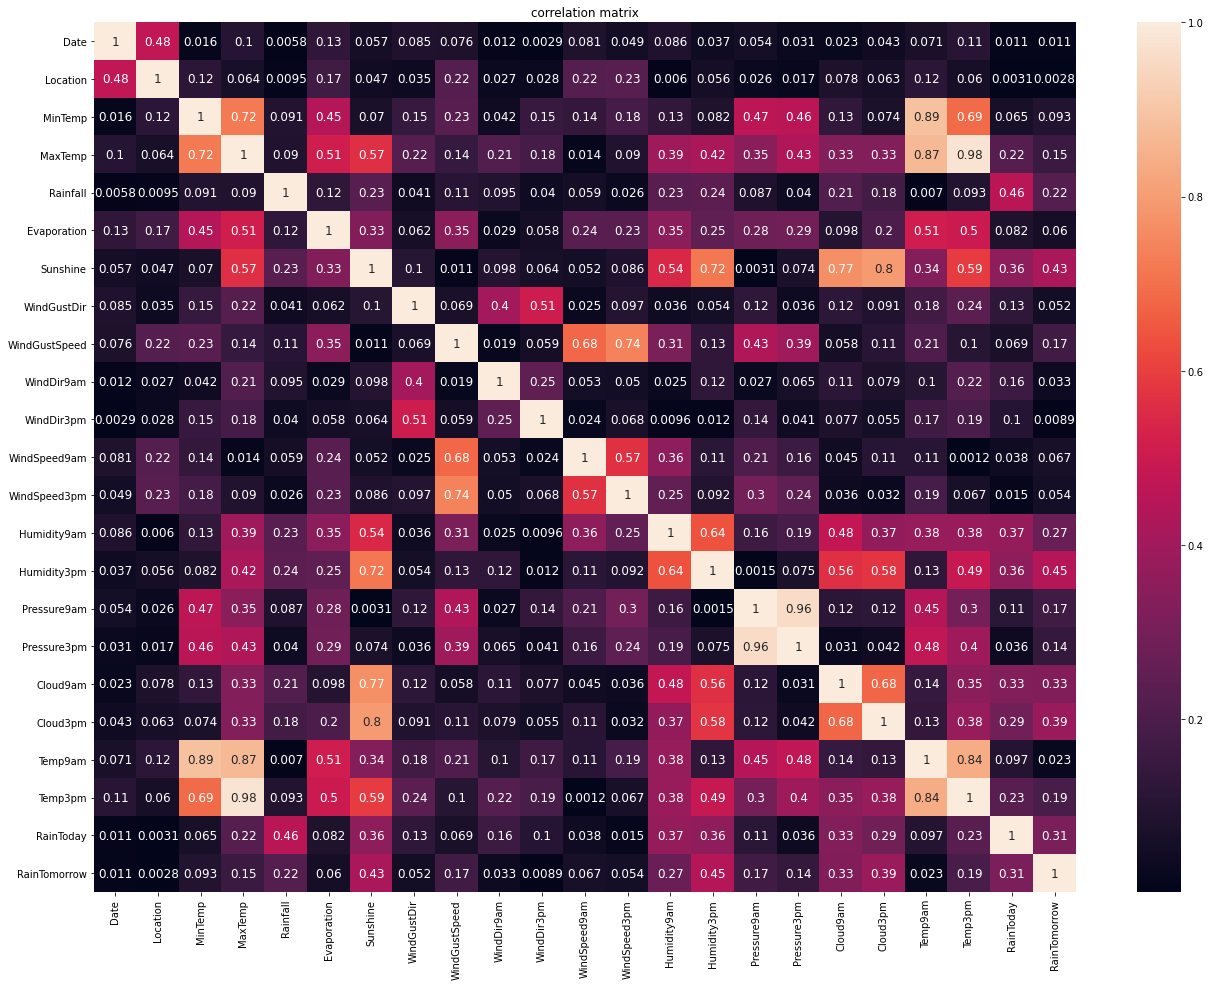

In [44]:
df_corr=it_df.corr().abs()

plt.figure(figsize=(22,16))
sns.heatmap(df_corr,annot=True,annot_kws={'size':12})
plt.title('correlation matrix')
plt.show()    

# Correlation of RainTomorrow with other features:

In [45]:
corr=it_df.corr()
corr['RainTomorrow'].sort_values(ascending=False)

RainTomorrow     1.000000
Humidity3pm      0.447071
Cloud3pm         0.387287
Cloud9am         0.326942
RainToday        0.312929
Humidity9am      0.272696
Rainfall         0.220949
WindGustSpeed    0.172344
MinTemp          0.093466
WindSpeed9am     0.066556
WindSpeed3pm     0.053970
WindGustDir      0.051832
WindDir9am       0.032860
WindDir3pm       0.008918
Location         0.002824
Date            -0.011228
Temp9am         -0.023344
Evaporation     -0.059587
Pressure3pm     -0.140021
MaxTemp         -0.153859
Pressure9am     -0.172347
Temp3pm         -0.193926
Sunshine        -0.426320
Name: RainTomorrow, dtype: float64

# Checking Outliers:

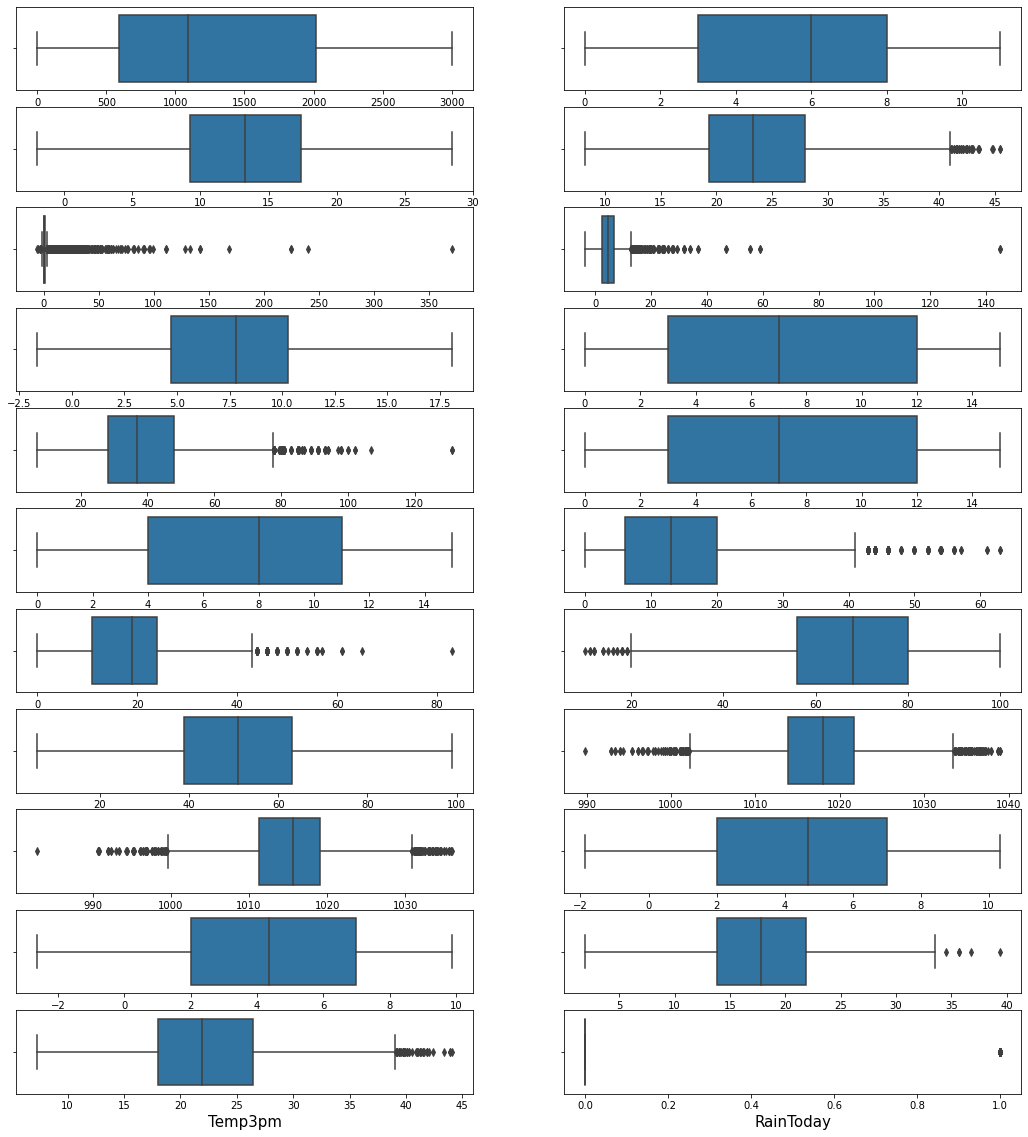

In [46]:
x=it_df.drop(columns=['RainTomorrow'])
plt.figure(figsize=(18,20))
graph=1
for column in x:
    if graph<=22:
        ax=plt.subplot(11,2,graph)
        sns.boxplot(x[column],orient='v')
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()    

The present outliers shown in the above graph can be removed using zscore technique

# Skewness:

In [47]:
it_df.skew()

Date              0.386560
Location         -0.050456
MinTemp          -0.091336
MaxTemp           0.379067
Rainfall         13.129959
Evaporation      10.355837
Sunshine         -0.233963
WindGustDir       0.119640
WindGustSpeed     0.789056
WindDir9am        0.172792
WindDir3pm       -0.119847
WindSpeed9am      0.964229
WindSpeed3pm      0.498013
Humidity9am      -0.257298
Humidity3pm       0.120910
Pressure9am      -0.093549
Pressure3pm      -0.064049
Cloud9am         -0.167696
Cloud3pm         -0.089573
Temp9am          -0.015475
Temp3pm           0.400711
RainToday         1.242362
RainTomorrow      1.241588
dtype: float64

# dropping all the columns which has skewness:

In [48]:
df1 = it_df.drop(columns=['Rainfall','Evaporation','WindGustSpeed','WindSpeed9am'])
df1

,Date,Location,MinTemp,MaxTemp,Sunshine,WindGustDir,WindDir9am,WindDir3pm,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.0,1.0,13.4,22.900000,6.567859,13.0,13.0,14.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,5.182827,16.9,21.8,0.0,0
1,1.0,1.0,7.4,25.100000,12.406433,14.0,6.0,15.0,22.0,44.0,25.0,1010.6,1007.8,1.047056,1.649611,17.2,24.3,0.0,0
2,2.0,1.0,12.9,25.700000,11.820881,15.0,13.0,15.0,26.0,38.0,30.0,1007.6,1008.7,2.100946,2.000000,21.0,23.2,0.0,0
3,3.0,1.0,9.2,28.000000,12.886565,4.0,9.0,0.0,9.0,45.0,16.0,1017.6,1012.8,0.452548,1.061087,18.1,26.5,0.0,0
4,4.0,1.0,17.5,32.300000,6.369314,13.0,1.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2999.0,9.0,2.8,23.400000,11.912692,0.0,9.0,1.0,11.0,51.0,24.0,1024.6,1020.3,0.666422,1.503963,10.1,22.4,0.0,0
8421,3000.0,9.0,3.6,25.300000,12.548026,6.0,9.0,3.0,9.0,56.0,21.0,1023.5,1019.1,0.532110,1.076773,10.9,24.5,0.0,0
8422,3001.0,9.0,5.4,26.900000,12.315648,3.0,9.0,14.0,9.0,53.0,24.0,1021.0,1016.8,0.779473,1.508223,12.5,26.1,0.0,0
8423,3002.0,9.0,7.8,27.000000,11.106576,9.0,10.0,3.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0.0,0


# Removing Outliers using zscore technique:

In [49]:
from scipy.stats import zscore
import numpy as np
zsc=zscore(df1)
abs_z_score=np.abs(zsc)
filtering_entry=(abs_z_score<3).all(axis=1)
df=df1[filtering_entry]
df

,Date,Location,MinTemp,MaxTemp,Sunshine,WindGustDir,WindDir9am,WindDir3pm,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.0,1.0,13.4,22.900000,6.567859,13.0,13.0,14.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,5.182827,16.9,21.8,0.0,0
1,1.0,1.0,7.4,25.100000,12.406433,14.0,6.0,15.0,22.0,44.0,25.0,1010.6,1007.8,1.047056,1.649611,17.2,24.3,0.0,0
2,2.0,1.0,12.9,25.700000,11.820881,15.0,13.0,15.0,26.0,38.0,30.0,1007.6,1008.7,2.100946,2.000000,21.0,23.2,0.0,0
3,3.0,1.0,9.2,28.000000,12.886565,4.0,9.0,0.0,9.0,45.0,16.0,1017.6,1012.8,0.452548,1.061087,18.1,26.5,0.0,0
4,4.0,1.0,17.5,32.300000,6.369314,13.0,1.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2999.0,9.0,2.8,23.400000,11.912692,0.0,9.0,1.0,11.0,51.0,24.0,1024.6,1020.3,0.666422,1.503963,10.1,22.4,0.0,0
8421,3000.0,9.0,3.6,25.300000,12.548026,6.0,9.0,3.0,9.0,56.0,21.0,1023.5,1019.1,0.532110,1.076773,10.9,24.5,0.0,0
8422,3001.0,9.0,5.4,26.900000,12.315648,3.0,9.0,14.0,9.0,53.0,24.0,1021.0,1016.8,0.779473,1.508223,12.5,26.1,0.0,0
8423,3002.0,9.0,7.8,27.000000,11.106576,9.0,10.0,3.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0.0,0


# checking percentage loss:

In [50]:
loss_percent=(8425-8291)/8425*100
loss_percent

1.5905044510385757

# Desired model and Scaling:

In [51]:
x=df.drop(columns='RainTomorrow')
y=df.RainTomorrow

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score

In [53]:
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

# Finding Best Random State:


In [54]:
knn=KNeighborsClassifier()
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    knn.fit(x_train,y_train)
    pred_test=knn.predict(x_test)
    acc=accuracy_score(y_test,pred_test)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
        
print('Best accuracy is: ',maxacc,'Best state is: ',maxrs)

Best accuracy is:  0.8499095840867993 Best state is:  196


# TRAIN TEST SPLIT:

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=196)


# Balancing the datset:

In [56]:
import six
import sys
sys.modules['sklearn.external.six']=six
from imblearn.over_sampling import SMOTE

sm=SMOTE()
over_samp=SMOTE(0.80)
x_train,y_train=over_samp.fit_sample(x_train,y_train)

In [57]:
from collections import Counter # to get the count 
print(Counter(y_train))


Counter({0: 5056, 1: 4044})


# K-NeighborsClassification Model:

In [ ]:
from sklearn.metrics import classification_report
knn.fit(x_train,y_train)
pred_test=knn.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,pred_test))
print('confusion_matrix: \n',confusion_matrix(y_test,pred_test))
print('classification report: ',classification_report(y_test,pred_test))

# DecisionTreeClassification model:

In [59]:
clf1=DecisionTreeClassifier()
clf1.fit(x_train,y_train)
pred_test=clf1.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,pred_test))
print('confusion_matrix: \n',confusion_matrix(y_test,pred_test))
print('classification report: ',classification_report(y_test,pred_test))

Accuracy:  0.8264014466546112
confusion_matrix: 
 [[1118  170]
 [ 118  253]]
classification report:                precision    recall  f1-score   support

           0       0.90      0.87      0.89      1288
           1       0.60      0.68      0.64       371

    accuracy                           0.83      1659
   macro avg       0.75      0.77      0.76      1659
weighted avg       0.84      0.83      0.83      1659



# LogisticRegression model:

In [60]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,pred_test))
print('confusion_matrix: \n',confusion_matrix(y_test,pred_test))
print('classification report: ',classification_report(y_test,pred_test))

Accuracy:  0.8010849909584087
confusion_matrix: 
 [[1050  238]
 [  92  279]]
classification report:                precision    recall  f1-score   support

           0       0.92      0.82      0.86      1288
           1       0.54      0.75      0.63       371

    accuracy                           0.80      1659
   macro avg       0.73      0.78      0.75      1659
weighted avg       0.83      0.80      0.81      1659



# RandomForestClassification model:

In [61]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()
clf.fit(x_train,y_train)
pred_test=clf.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,pred_test))
print('confusion_matrix: \n',confusion_matrix(y_test,pred_test))
print('classification report: ',classification_report(y_test,pred_test))

Accuracy:  0.8939119951778179
confusion_matrix: 
 [[1198   90]
 [  86  285]]
classification report:                precision    recall  f1-score   support

           0       0.93      0.93      0.93      1288
           1       0.76      0.77      0.76       371

    accuracy                           0.89      1659
   macro avg       0.85      0.85      0.85      1659
weighted avg       0.89      0.89      0.89      1659



# cross_validation_score:

In [62]:
pred_test=clf.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_test)
for i in range(2,10):
    lsscore=cross_val_score(clf,x,y,cv=i)
    lsc=lsscore.mean()
    print('at cv:-',i)
    print('cv score-',lsc*100)
    print('acc_score-',lss*100)

at cv:- 2
cv score- 77.47030142849911
acc_score- 89.3911995177818
at cv:- 3
cv score- 83.36808987343784
acc_score- 89.3911995177818
at cv:- 4
cv score- 77.96482328410693
acc_score- 89.3911995177818
at cv:- 5
cv score- 84.04297646132403
acc_score- 89.3911995177818
at cv:- 6
cv score- 82.05293185408897
acc_score- 89.3911995177818
at cv:- 7
cv score- 85.88841780297477
acc_score- 89.3911995177818
at cv:- 8
cv score- 86.74604312261013
acc_score- 89.3911995177818
at cv:- 9
cv score- 88.49484027259292
acc_score- 89.3911995177818


CV at 9 is considered.

# CHECKING CV FOR ALL THE MODELS:

In [63]:
from sklearn.model_selection import cross_val_score
csv=cross_val_score(knn,x_scaled,y,cv=9)
print('cross validation score of knn model is:',csv.mean())

cross validation score of knn model is: 0.7958036537459545


In [64]:
csv=cross_val_score(clf1,x_scaled,y,cv=9)
print('cross validation score of decision tree model is:',csv.mean())

cross validation score of decision tree model is: 0.8228412900666252


In [65]:
csv=cross_val_score(lr,x_scaled,y,cv=9)
print('cross validation score of logistic regression model is:',csv.mean())

cross validation score of logistic regression model is: 0.820158906990395


In [66]:
csv=cross_val_score(clf,x_scaled,y,cv=9)
print('cross validation score of Random forest classifier model is:',csv.mean())

cross validation score of Random forest classifier model is: 0.8853091505376934


# HYPER PARAMETER TUNING:

In [67]:
from sklearn.model_selection import GridSearchCV
params={    'criterion':['gini','entropy'],
            'max_depth':[10,15],
            'min_samples_split':[10,11],
            'min_samples_leaf':[5,6]
           }
gri=GridSearchCV(clf,param_grid=params,cv=9,scoring='accuracy')it_df = it_df.apply(lambda x: x.fillna(x.value_counts().index[0]))
it_df.isnull().sum()
gri.fit(x_train,y_train)


GridSearchCV(cv=9, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15], 'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11]},
             scoring='accuracy')

In [68]:
print(gri.best_params_)
gri_pred=gri.best_estimator_.predict(x_test)

{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10}


In [69]:
accuracy_score(y_test,gri_pred)

0.8758288125376733

# Saving the model:

In [70]:
import pickle
filename='RainTomorrow.pkl'
pickle.dump(gri.best_estimator_,open(filename,'wb'))


# Conclusion:

In [71]:
import numpy as np
a=np.array(y_test)
predicted=np.array(gri.best_estimator_.predict(x_test))
df_conclusion=pd.DataFrame({'Original':a,'Predicted':predicted},index=range(len(a)))
df_conclusion

,Original,Predicted
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0
...,...,...
1654,0,0
1655,0,0
1656,0,1
1657,1,1


# Prediction 2:

# loading the datset:

In [72]:
df=pd.read_csv('weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [73]:
df.isnull().sum()# checking the null count

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

# Imputing the data for clearing the null value counts:

In [74]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.compose import make_column_transformer
iter_imp=IterativeImputer()
ct=make_column_transformer( (iter_imp,['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm','Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am','Temp3pm']),
                            remainder='passthrough')

it_df=pd.DataFrame(ct.fit_transform(df))
it_df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,13.4,22.9,0.6,5.146735,6.567859,44.0,20.0,24.0,71.0,22.0,...,5.182827,16.9,21.8,2008-12-01,Albury,W,W,WNW,No,No
1,7.4,25.1,0.0,5.824202,12.406433,44.0,4.0,22.0,44.0,25.0,...,1.649611,17.2,24.3,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,12.9,25.7,0.0,7.243981,11.820881,46.0,19.0,26.0,38.0,30.0,...,2.0,21.0,23.2,2008-12-03,Albury,WSW,W,WSW,No,No
3,9.2,28.0,0.0,5.406861,12.886565,24.0,11.0,9.0,45.0,16.0,...,1.061087,18.1,26.5,2008-12-04,Albury,NE,SE,E,No,No
4,17.5,32.3,1.0,5.333187,6.369314,41.0,7.0,20.0,82.0,33.0,...,8.0,17.8,29.7,2008-12-05,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2.8,23.4,0.0,4.07979,11.912692,31.0,13.0,11.0,51.0,24.0,...,1.503963,10.1,22.4,2017-06-21,Uluru,E,SE,ENE,No,No
8421,3.6,25.3,0.0,3.812303,12.548026,22.0,13.0,9.0,56.0,21.0,...,1.076773,10.9,24.5,2017-06-22,Uluru,NNW,SE,N,No,No
8422,5.4,26.9,0.0,5.611019,12.315648,37.0,9.0,9.0,53.0,24.0,...,1.508223,12.5,26.1,2017-06-23,Uluru,N,SE,WNW,No,No
8423,7.8,27.0,0.0,5.883597,11.106576,28.0,13.0,7.0,51.0,24.0,...,2.0,15.1,26.0,2017-06-24,Uluru,SE,SSE,N,No,No


In [75]:
column_to_move = it_df.pop(16)
it_df.insert(0, 'Date', column_to_move)
column_to_move1 = it_df.pop(17)
it_df.insert(1, 'Location', column_to_move1)
column_to_move2 = it_df.pop(18)
it_df.insert(7, 'WindGustDir', column_to_move2)
column_to_move3 = it_df.pop(19)
it_df.insert(9, 'WindDir9am', column_to_move3)
column_to_move4 = it_df.pop(20)
it_df.insert(10, 'WindDir3pm', column_to_move4)

it_df.columns=df.columns
it_df.index=df.index
it_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.146735,6.567859,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,5.182827,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.824202,12.406433,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,1.047056,1.649611,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,7.243981,11.820881,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,2.100946,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.406861,12.886565,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,0.452548,1.061087,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.333187,6.369314,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,4.07979,11.912692,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,0.666422,1.503963,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,3.812303,12.548026,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,0.53211,1.076773,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,5.611019,12.315648,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,0.779473,1.508223,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,5.883597,11.106576,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [76]:
it_df = it_df.apply(lambda x: x.fillna(x.value_counts().index[0]))
it_df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [77]:
it_df.shape

(8425, 23)

# Describing the dataset:


In [78]:
it_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,13.194294,23.857947,2.838292,5.034172,7.457193,39.297998,13.858739,18.508434,67.833486,51.243486,1017.810984,1015.356942,4.408351,4.348689,17.766091,22.429312
std,5.390522,6.124564,10.330502,4.290490,3.698789,14.809269,10.166880,9.721978,16.789487,18.373574,6.353498,6.277211,2.656876,2.520556,5.615919,5.962223
min,-2.000000,8.200000,-5.995908,-3.614712,-1.653687,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,-1.866715,-2.630109,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.700000,28.157988,6.000000,11.000000,56.000000,39.000000,1013.900000,1011.300000,2.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.591377,7.808209,37.000000,13.000000,19.000000,68.000000,51.000000,1018.001722,1015.568277,4.700894,4.371862,17.800000,21.900000
75%,17.400000,28.000000,1.200000,6.748722,10.300000,48.000000,20.000000,24.000000,80.000000,63.000000,1021.700000,1019.100000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,18.090984,131.206997,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,10.335280,9.888378,39.400000,44.100000


# graphical analysis:
USing scatter matrix

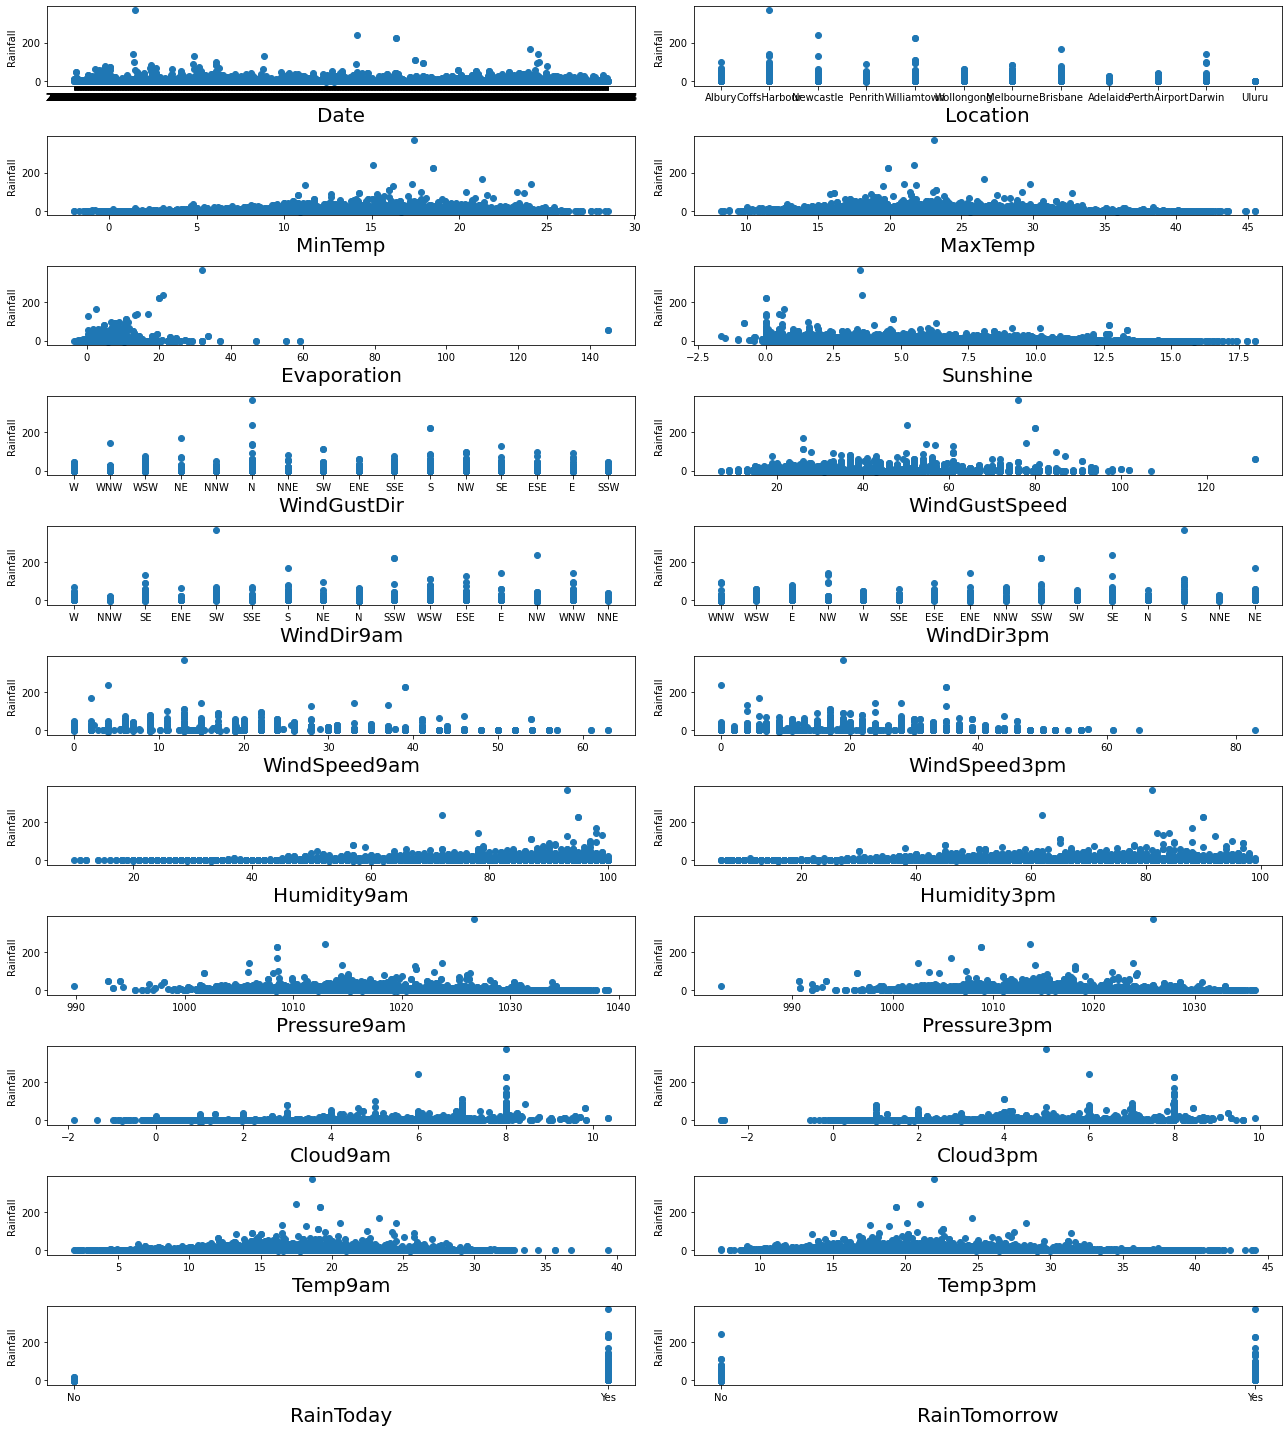

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

y=it_df['Rainfall']
x=it_df.drop(columns=['Rainfall'])
plt.figure(figsize=(18,20),facecolor='white')
plotnumber=1
for column in x:
    if plotnumber<=22:
        ax=plt.subplot(11,2,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Rainfall',fontsize=10)
    plotnumber+=1 
plt.tight_layout()

# OrdinalEncoder:
Used to convert the data to ordinal format.

In [80]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc=OrdinalEncoder()

for i in it_df.columns:
    if it_df[i].dtypes=="object":
        it_df[i]=ord_enc.fit_transform(it_df[i].values.reshape(-1,1))

# Correlation using heatmap:

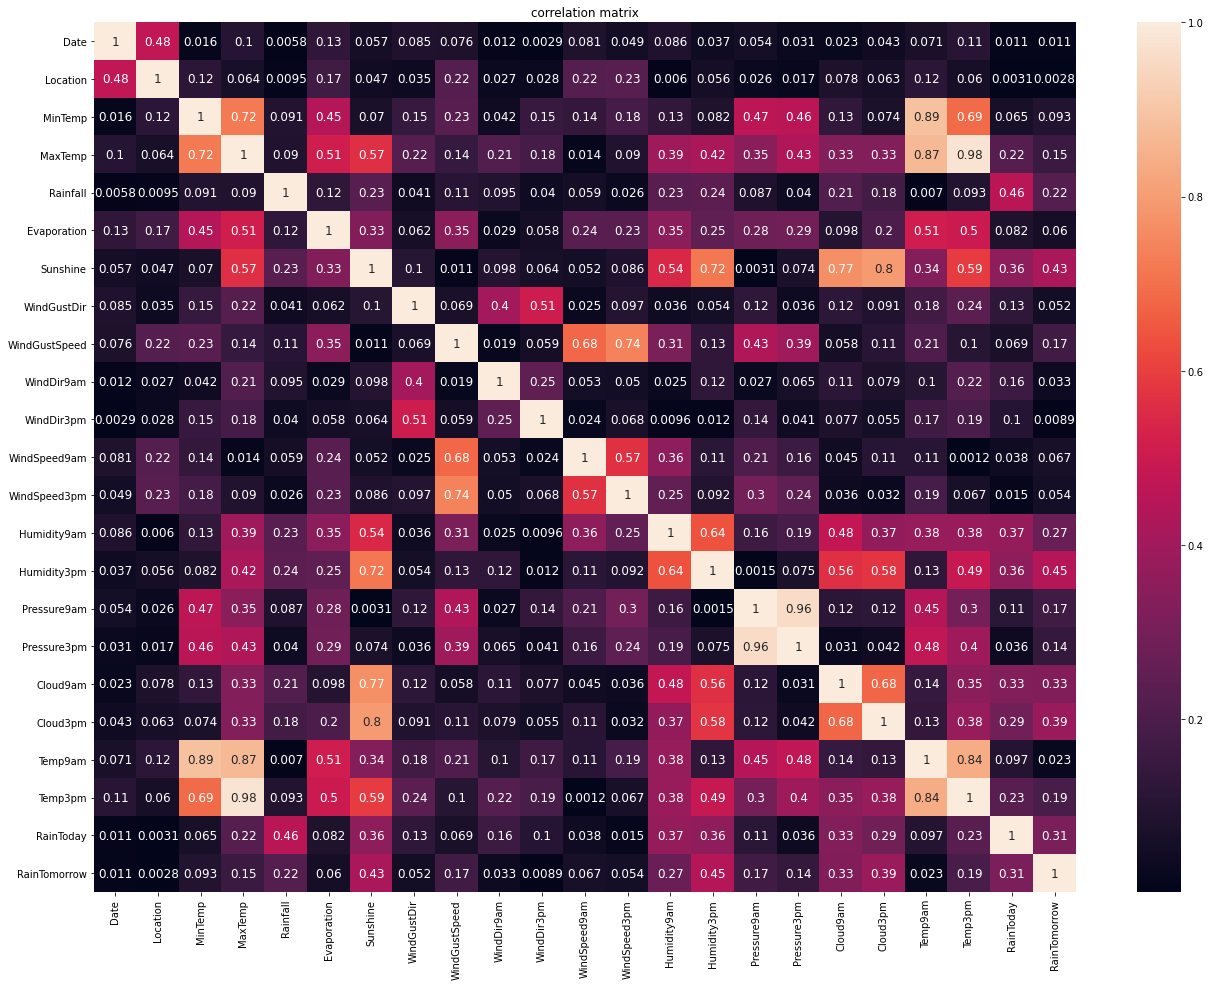

In [81]:
df_corr=it_df.corr().abs()

plt.figure(figsize=(22,16))
sns.heatmap(df_corr,annot=True,annot_kws={'size':12})
plt.title('correlation matrix')
plt.show()    

In [82]:
corr=it_df.corr()
corr['Rainfall'].sort_values(ascending=False)

Rainfall         1.000000
RainToday        0.458417
Humidity3pm      0.242684
Humidity9am      0.234356
RainTomorrow     0.220949
Cloud9am         0.213636
Cloud3pm         0.178466
Evaporation      0.124148
WindGustSpeed    0.109950
WindDir9am       0.094616
MinTemp          0.091095
WindSpeed9am     0.058552
WindGustDir      0.041137
WindDir3pm       0.039600
WindSpeed3pm     0.026437
Location         0.009531
Date             0.005803
Temp9am         -0.007039
Pressure3pm     -0.040042
Pressure9am     -0.086951
MaxTemp         -0.089526
Temp3pm         -0.092887
Sunshine        -0.230228
Name: Rainfall, dtype: float64

>Correlation of target variable with other features in the dataset.

# Checking the outliers:

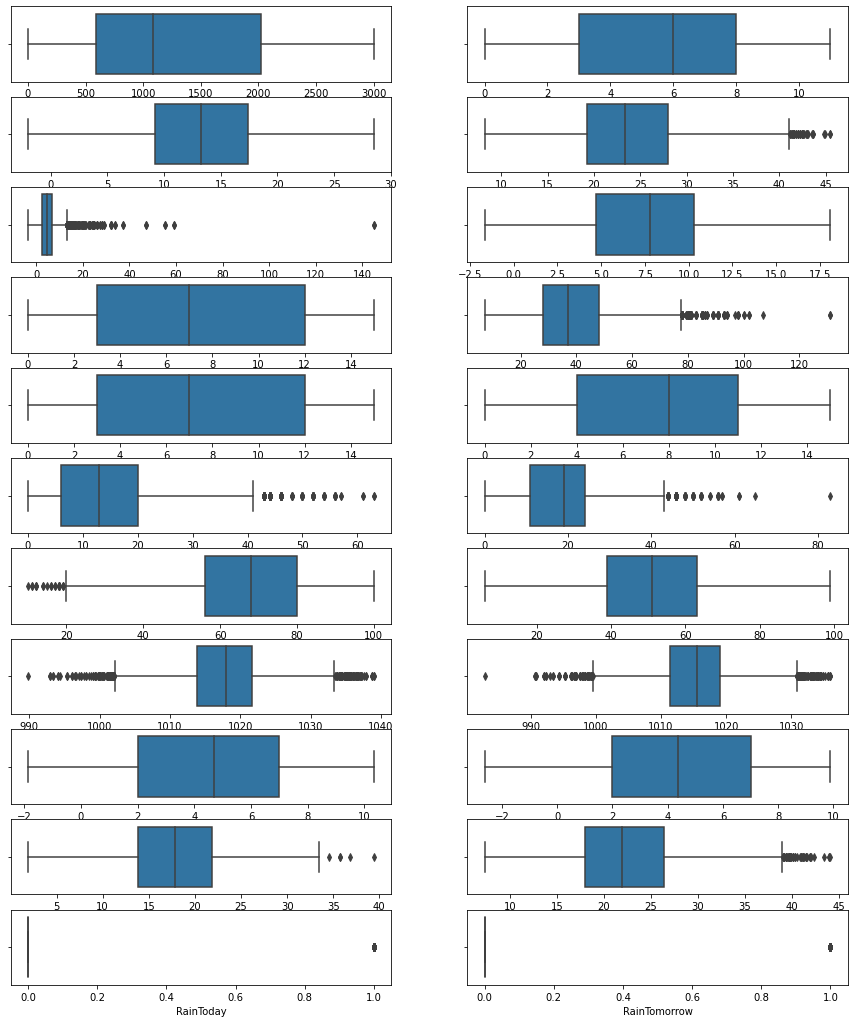

In [83]:
x=it_df.drop(columns=['Rainfall'])
plt.figure(figsize=(15,18))
graph=1
for column in x:
    if graph<=22:
        ax=plt.subplot(11,2,graph)
        sns.boxplot(x[column],orient='v')
        plt.xlabel(column)
    graph+=1
plt.show()  

# Skewness:

In [84]:
it_df.skew()

Date              0.386560
Location         -0.050456
MinTemp          -0.091336
MaxTemp           0.379067
Rainfall         13.129959
Evaporation      10.355837
Sunshine         -0.233963
WindGustDir       0.119640
WindGustSpeed     0.789056
WindDir9am        0.172792
WindDir3pm       -0.119847
WindSpeed9am      0.964229
WindSpeed3pm      0.498013
Humidity9am      -0.257298
Humidity3pm       0.120910
Pressure9am      -0.093549
Pressure3pm      -0.064049
Cloud9am         -0.167696
Cloud3pm         -0.089573
Temp9am          -0.015475
Temp3pm           0.400711
RainToday         1.242362
RainTomorrow      1.241588
dtype: float64

In [ ]:
# dropping all the unnecessary columns:

In [85]:
it_df=it_df.drop(columns=['Evaporation','WindGustSpeed','WindSpeed9am'])
it_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustDir,WindDir9am,WindDir3pm,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.0,1.0,13.4,22.900000,0.6,6.567859,13.0,13.0,14.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,5.182827,16.9,21.8,0.0,0.0
1,1.0,1.0,7.4,25.100000,0.0,12.406433,14.0,6.0,15.0,22.0,44.0,25.0,1010.6,1007.8,1.047056,1.649611,17.2,24.3,0.0,0.0
2,2.0,1.0,12.9,25.700000,0.0,11.820881,15.0,13.0,15.0,26.0,38.0,30.0,1007.6,1008.7,2.100946,2.000000,21.0,23.2,0.0,0.0
3,3.0,1.0,9.2,28.000000,0.0,12.886565,4.0,9.0,0.0,9.0,45.0,16.0,1017.6,1012.8,0.452548,1.061087,18.1,26.5,0.0,0.0
4,4.0,1.0,17.5,32.300000,1.0,6.369314,13.0,1.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2999.0,9.0,2.8,23.400000,0.0,11.912692,0.0,9.0,1.0,11.0,51.0,24.0,1024.6,1020.3,0.666422,1.503963,10.1,22.4,0.0,0.0
8421,3000.0,9.0,3.6,25.300000,0.0,12.548026,6.0,9.0,3.0,9.0,56.0,21.0,1023.5,1019.1,0.532110,1.076773,10.9,24.5,0.0,0.0
8422,3001.0,9.0,5.4,26.900000,0.0,12.315648,3.0,9.0,14.0,9.0,53.0,24.0,1021.0,1016.8,0.779473,1.508223,12.5,26.1,0.0,0.0
8423,3002.0,9.0,7.8,27.000000,0.0,11.106576,9.0,10.0,3.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0.0,0.0


# ZSCORE TECHNIQUE:
TO REMOVE OUTLIERS:

In [86]:
from scipy.stats import zscore
import numpy as np
zsc=zscore(it_df)
abs_z_score=np.abs(zsc)
filtering_entry=(abs_z_score<3).all(axis=1)
df=it_df[filtering_entry]
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustDir,WindDir9am,WindDir3pm,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.0,1.0,13.4,22.900000,0.6,6.567859,13.0,13.0,14.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,5.182827,16.9,21.8,0.0,0.0
1,1.0,1.0,7.4,25.100000,0.0,12.406433,14.0,6.0,15.0,22.0,44.0,25.0,1010.6,1007.8,1.047056,1.649611,17.2,24.3,0.0,0.0
2,2.0,1.0,12.9,25.700000,0.0,11.820881,15.0,13.0,15.0,26.0,38.0,30.0,1007.6,1008.7,2.100946,2.000000,21.0,23.2,0.0,0.0
3,3.0,1.0,9.2,28.000000,0.0,12.886565,4.0,9.0,0.0,9.0,45.0,16.0,1017.6,1012.8,0.452548,1.061087,18.1,26.5,0.0,0.0
4,4.0,1.0,17.5,32.300000,1.0,6.369314,13.0,1.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2999.0,9.0,2.8,23.400000,0.0,11.912692,0.0,9.0,1.0,11.0,51.0,24.0,1024.6,1020.3,0.666422,1.503963,10.1,22.4,0.0,0.0
8421,3000.0,9.0,3.6,25.300000,0.0,12.548026,6.0,9.0,3.0,9.0,56.0,21.0,1023.5,1019.1,0.532110,1.076773,10.9,24.5,0.0,0.0
8422,3001.0,9.0,5.4,26.900000,0.0,12.315648,3.0,9.0,14.0,9.0,53.0,24.0,1021.0,1016.8,0.779473,1.508223,12.5,26.1,0.0,0.0
8423,3002.0,9.0,7.8,27.000000,0.0,11.106576,9.0,10.0,3.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0.0,0.0


# checking percentage loss:

In [87]:
loss_percent=(8425-8178)/8425*100
loss_percent

2.9317507418397626

# Desired model and scaling the data:

In [88]:
x=df.drop(columns='Rainfall')
y=df.Rainfall

In [89]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.52234102, -1.51670774,  0.04920442, ..., -0.10367817,
        -0.54050648, -0.54484873],
       [-1.52116586, -1.51670774, -1.06429582, ...,  0.32058001,
        -0.54050648, -0.54484873],
       [-1.51999071, -1.51670774, -0.04358727, ...,  0.13390641,
        -0.54050648, -0.54484873],
       ...,
       [ 2.00429613,  1.01885089, -1.43546256, ...,  0.6260459 ,
        -0.54050648, -0.54484873],
       [ 2.00547128,  1.01885089, -0.99006247, ...,  0.60907558,
        -0.54050648, -0.54484873],
       [ 2.00664643,  1.01885089,  0.32757948, ..., -0.25641111,
        -0.54050648, -0.54484873]])

# Model building:

In [90]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Train test split:

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=41)


# LinearRegression model:

In [92]:
regression=LinearRegression()
regression.fit(x_train,y_train)
y_pred=regression.predict(x_test)
y_pred

array([ 0.49293882,  0.74012744,  0.08630906, ..., -0.2626528 ,
        7.39120111, -1.01036271])

In [93]:
y_trpred=regression.predict(x_train)
y_trpred

array([-0.40332117,  1.32825473, -0.00213913, ...,  0.97184309,
       -0.06018935, -0.1584704 ])

In [94]:
r2_score(y_test,y_pred) #r2 score of linear regression model

0.4764062765998678

# Hyper parameter tunning:

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

parameters={'alpha':[0.0001,.001,.01,.1,1,10], 'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


# Lasso model:

In [96]:
from sklearn.linear_model import Lasso
ls=Lasso(alpha=.001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss

0.4761396873097202

# cross_val_score:

In [97]:
from sklearn.model_selection import cross_val_score
csv=cross_val_score(ls,x,y,cv=9)
cv_mean=csv.mean()
cv_mean

0.47132362255182986

# RandomForestRegression model:

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


parameters={'criterion':['mse', 'mae'],
            'max_features':['auto', 'sqrt', 'log2'],
            'max_depth':[10,15],
            'min_samples_split':[10,11]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

In [104]:
rf=RandomForestRegressor(criterion='mse',max_features='log2',max_depth=15,min_samples_split=10)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_rf=rf.predict(x_test)

rfs=r2_score(y_test,pred_rf)
print('R2 Score: ',rfs*100)

rfcsv=cross_val_score(rf,x,y,cv=4)
rf_cv_mean=rfcsv.mean()
print('Cross validation Score: ',rf_cv_mean*100)

R2 Score:  62.47947528822917
Cross validation Score:  49.93407351229829


# DecisionTreeRegression model:


In [ ]:
from sklearn.tree import DecisionTreeRegressor

param_grid={'criterion':['mse', 'mae'],
            'max_depth':range(10,15),
            'min_samples_split':range(3,8),
            'max_features':['auto', 'sqrt', 'log2'],
            #'max_leaf_nodea':range(3,7)
           }
dtr=DecisionTreeRegressor()
clf=GridSearchCV(dtr,param_grid)
clf.fit(x_train,y_train)

print(clf.best_params_)

In [105]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(criterion='mse',max_features='auto',max_depth=13,min_samples_split=5)
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)
pred_dtr=dtr.predict(x_test)

dtrs=r2_score(y_test,pred_dtr)
print('R2 Score: ',dtrs*100)

dtrcsv=cross_val_score(dtr,x,y,cv=4)
dtr_cv_mean=dtrcsv.mean()
print('Cross validation Score: ',dtr_cv_mean*100)

R2 Score:  33.96510257666263
Cross validation Score:  9.116172063620684


# SVR model:

In [106]:
from sklearn.svm import SVR
parameters={'kernel':['linear','poly', 'rbf'],'gamma':['scale', 'auto']}
svr=SVR()
clf1=GridSearchCV(svr,parameters)
clf1.fit(x_train,y_train)

print(clf1.best_params_)

{'gamma': 'scale', 'kernel': 'rbf'}


In [107]:
svr=SVR(kernel='rbf',gamma='scale')
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_rf=svr.predict(x_test)

svrs=r2_score(y_test,pred_rf)
print('R2 Score: ',svrs*100)

svrcsv=cross_val_score(svr,x,y,cv=3)
svr_cv_mean=svrcsv.mean()
print('Cross validation Score: ',svr_cv_mean*100)

R2 Score:  42.50587387545578
Cross validation Score:  37.61463806497243


>Random Forest Regression model is considered ,since it is performing decently good so finalising this model.

# Saving the model:

In [108]:
import pickle
filename='Rainfall.pkl'
pickle.dump(rf,open(filename,'wb'))

# Loading and testing teh model score:

In [109]:
loaded_model=pickle.load(open('Rainfall.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.6247947528822917


# Conclusion:

In [110]:
import numpy as np
a=np.array(y_test)
predicted=np.array(rf.predict(x_test))
df_conclusion=pd.DataFrame({'Original_sales':a,'Predicted_sales':predicted},index=range(len(a)))
df_conclusion

,Original_sales,Predicted_sales
0,0.2,0.467028
1,0.0,0.065106
2,0.0,0.024114
3,3.4,8.498113
4,18.8,12.444524
...,...,...
1631,0.0,0.121076
1632,0.0,0.518157
1633,0.0,-0.034039
1634,8.6,7.413302
